In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages/yt-3.2.dev0-py2.7-linux-x86_64.egg')
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages')
sys.path.append('/global/homes/d/dorislee/mypythonpackages')
import yt
yt.funcs.mylog.setLevel(50) #coerce output null
# import plot_is

In [3]:
import plot_is

In [4]:
cd ~/ramses/trunk/ramses/bin/

/global/u2/d/dorislee/ramses/trunk/ramses/bin


In [5]:
# plot_is.plot_time_slice("density",1)

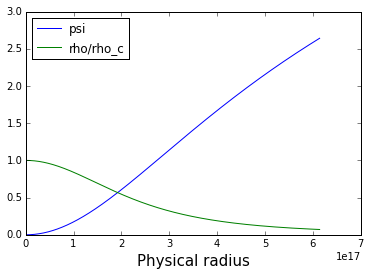

In [6]:
xi_max = 6.451
from scipy import integrate
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
plt.plot(r,asol[:,0],label ='psi')#$\psi$' )
plt.plot(r,rho,label ='rho/rho_c')#$\rho$')
plt.xlabel("Physical radius",fontsize=15)
from matplotlib.legend_handler import HandlerLine2D
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

In [12]:
np.savetxt("../patch/hydro/isothermal_sphere/density.txt",rho)

In [13]:
rho

array([ 1.        ,  0.99998331,  0.99993331,  0.99984999,  0.99973336,
        0.99958344,  0.99940025,  0.99918383,  0.9989342 ,  0.99865141,
        0.9983355 ,  0.99798653,  0.99760454,  0.99718961,  0.99674179,
        0.99626115,  0.99574778,  0.99520175,  0.99462316,  0.99401209,
        0.99336863,  0.9926929 ,  0.991985  ,  0.99124503,  0.99047312,
        0.98966939,  0.98883396,  0.98796696,  0.98706853,  0.98613881,
        0.98517795,  0.98418609,  0.98316338,  0.98210999,  0.98102608,
        0.97991181,  0.97876735,  0.97759289,  0.9763886 ,  0.97515466,
        0.97389126,  0.9725986 ,  0.97127687,  0.96992626,  0.96854699,
        0.96713926,  0.96570328,  0.96423927,  0.96274743,  0.961228  ,
        0.9596812 ,  0.95810725,  0.95650638,  0.95487884,  0.95322485,
        0.95154467,  0.94983852,  0.94810666,  0.94634933,  0.94456679,
        0.94275929,  0.94092709,  0.93907044,  0.93718961,  0.93528486,
        0.93335646,  0.93140467,  0.92942977,  0.92743202,  0.92

In [11]:
rho.shape

(646,)

In [7]:
dr = 0.01
rho_c = 0.02806 #[1.1e-19 from Larson's paper in code units]
N = 32
xmax=32
ymax=32
zmax=32
img = np.zeros((xmax,ymax,zmax))
for x in np.linspace(-1.0*(img.shape[0]-1)/2.,(img.shape[0]-1)/2.,N):
    for y in np.linspace(-1.0*(img.shape[1]-1)/2.,(img.shape[1]-1)/2.,N):
        for z in np.linspace(-1.0*(img.shape[1]-1)/2.,(img.shape[1]-1)/2.,N):
            r = np.sqrt(x**2+y**2+z**2)
            #theta = np.arctan(y/x) 
            if (r<xi_max):
    #             rho_i=5
                xi = int(r/dr)
                #print r,xi
                rho_i =rho[xi]*rho_c
                #print r, xi,rho_i
            else:
                rho_i = 1.0e-6
            img[x+xmax/2][y+ymax/2][z+zmax/2]=rho_i

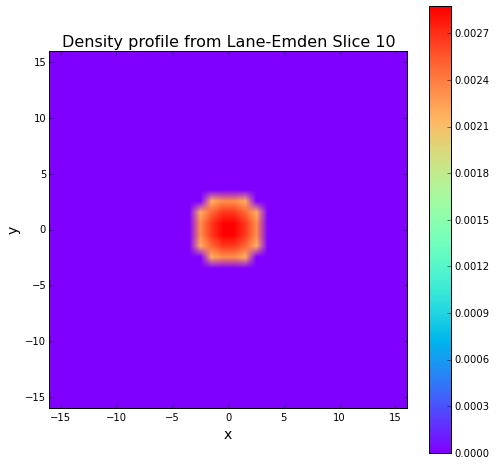

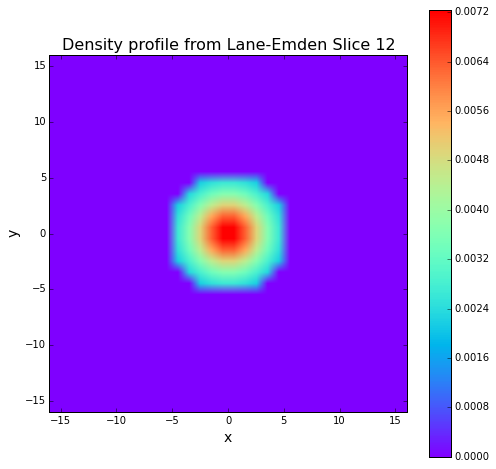

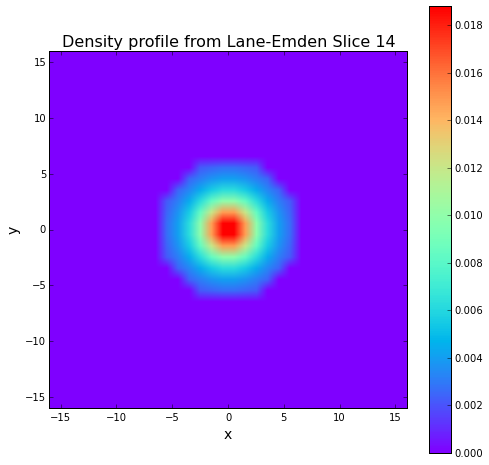

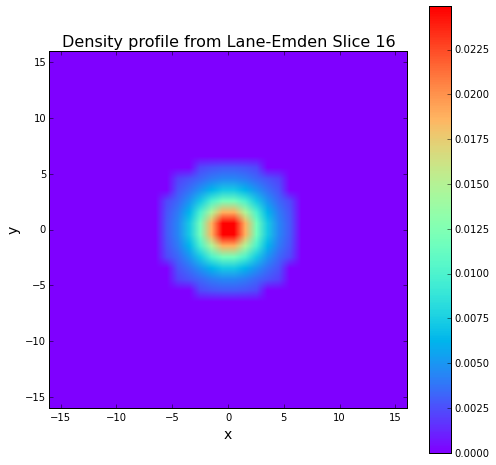

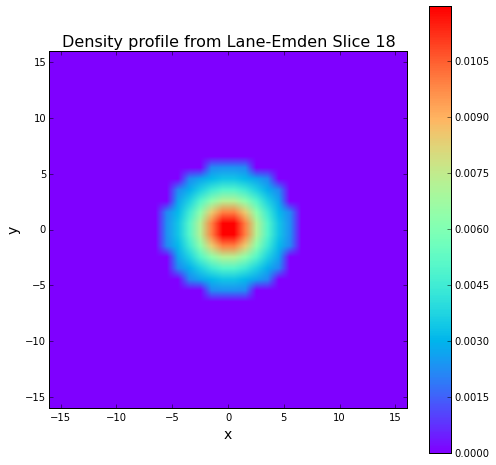

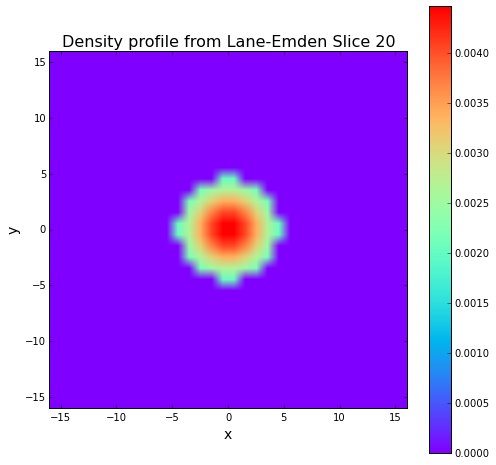

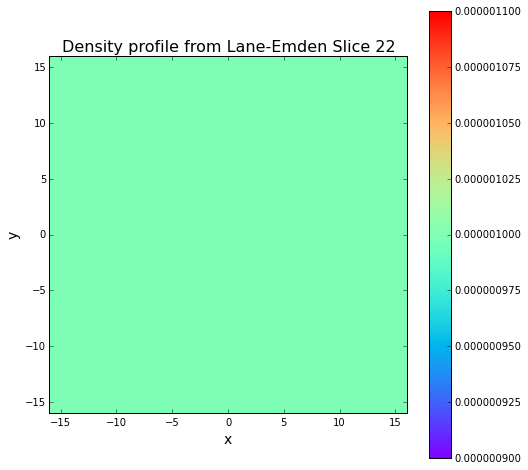

In [9]:
#from matplotlib.colors import LogNorm
for i in np.arange(10,23,2):
    plt.figure(figsize=(8,8))
    im = plt.imshow(img[::,i],cmap="rainbow")#,norm=LogNorm())#,origin="lower")
    im.set_extent([-xmax/2,xmax/2,-ymax/2,ymax/2])
    plt.title("Density profile from Lane-Emden Slice {}".format(i) ,fontsize=16)
    plt.xlabel("x",fontsize=14)
    plt.ylabel("y",fontsize=14)
    plt.colorbar()

In [49]:
ds= yt.load("output_{0}/info_{0}.txt".format(str(2).zfill(5)))
all_data_level_6 = ds.covering_grid(level=6, left_edge=[0,0.0,0.0],dims=[32,32,32])
all_data_level_6['density'].shape

(32, 32, 32)

In [50]:
all_data_level_6['density']

YTArray([[[  3.92339999e-24,   3.92339999e-24,   3.92339999e-24, ...,
           3.92339999e-24,   3.92339999e-24,   3.92339999e-24],
        [  3.92339999e-24,   3.92339999e-24,   3.92339999e-24, ...,
           3.92339999e-24,   3.92339999e-24,   3.92339999e-24],
        [  3.92339999e-24,   3.92339999e-24,   3.92339999e-24, ...,
           3.92339999e-24,   3.92339999e-24,   3.92339999e-24],
        ..., 
        [  3.92339999e-24,   3.92339999e-24,   3.92339999e-24, ...,
           3.92339999e-24,   3.92339999e-24,   3.92339999e-24],
        [  3.92339999e-24,   3.92339999e-24,   3.92339999e-24, ...,
           3.92339999e-24,   3.92339999e-24,   3.92339999e-24],
        [  3.92339999e-24,   3.92339999e-24,   3.92339999e-24, ...,
           3.92339999e-24,   3.92339999e-24,   3.92339999e-24]],

       [[  3.92339999e-24,   3.92339999e-24,   3.92339999e-24, ...,
           3.92339999e-24,   3.92339999e-24,   3.92339999e-24],
        [  3.92339999e-24,   3.92339999e-24,   3.92339999e